<a href="https://colab.research.google.com/github/SokichiFujita/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Chapter4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

Text(0, 0.5, 'y')

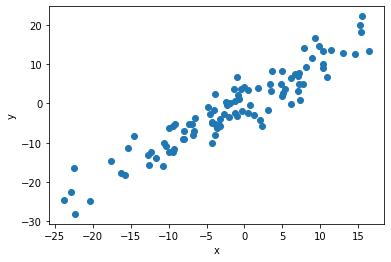

In [2]:
X = torch.randn(100,1) * 10
y = X + torch.randn(100,1) * 3
plt.plot(X.numpy(),y.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w,b] = model.parameters()
print(w)
print(b)

Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [0]:
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1 * x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

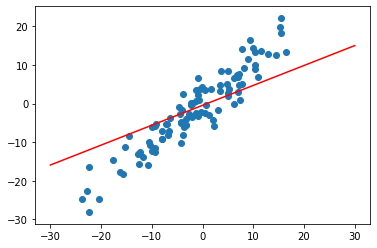

In [8]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss() #Mean Squared Loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #Stochastic Gradient Descent function

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print('epoch:', i, 'loss:', loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 33.32694625854492
epoch: 1 loss: 24.704343795776367
epoch: 2 loss: 19.53070831298828
epoch: 3 loss: 16.424633026123047
epoch: 4 loss: 14.558082580566406
epoch: 5 loss: 13.434699058532715
epoch: 6 loss: 12.756963729858398
epoch: 7 loss: 12.34652042388916
epoch: 8 loss: 12.096460342407227
epoch: 9 loss: 11.942691802978516
epoch: 10 loss: 11.846790313720703
epoch: 11 loss: 11.785717964172363
epoch: 12 loss: 11.745661735534668
epoch: 13 loss: 11.718334197998047
epoch: 14 loss: 11.698765754699707
epoch: 15 loss: 11.683969497680664
epoch: 16 loss: 11.672151565551758
epoch: 17 loss: 11.662232398986816
epoch: 18 loss: 11.653560638427734
epoch: 19 loss: 11.64574146270752
epoch: 20 loss: 11.638532638549805
epoch: 21 loss: 11.631789207458496
epoch: 22 loss: 11.625414848327637
epoch: 23 loss: 11.619353294372559
epoch: 24 loss: 11.613565444946289
epoch: 25 loss: 11.608023643493652
epoch: 26 loss: 11.60270881652832
epoch: 27 loss: 11.597607612609863
epoch: 28 loss: 11.592706680297852


Text(0.5, 0, 'epoch')

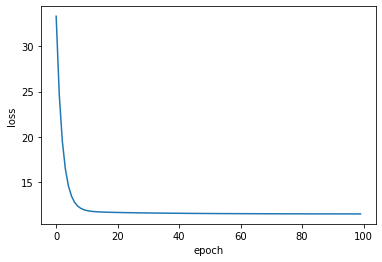

In [11]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

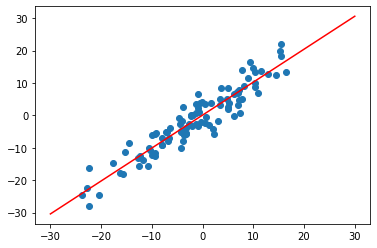

In [12]:
plot_fit("traine model")